Атаки через датасеты (Data Poisoning Attacks) – это метод компрометации модели машинного обучения путем изменения данных на этапе обучения. Они используются для манипуляции предсказаниями модели, ослабления ее точности или внедрения скрытых уязвимостей.

# Виды атак на датасеты
**1. Poisoning Attacks (Отравление данных)**

Злоумышленник изменяет небольшую часть обучающего датасета, чтобы:

* Снизить точность модели (Data Corruption).
* Встроить бэкдор (Backdoor Attack) — модель будет выдавать неправильные предсказания при появлении определенного триггера.

Примеры:

* BadNets: добавление небольшого визуального триггера (например, белого квадрата) к изображениям в обучении, чтобы модель ассоциировала этот триггер с определенным классом.
* TrojanNN: модификация весов модели так, чтобы она реагировала на определенные паттерны.

**2. Label Flipping Attacks (Подмена меток)**

Злоумышленник изменяет метки некоторых объектов, чтобы модель обучилась неправильно.

Пример:

* В датасете для детекции вредоносного кода заменяются метки "вредоносное ПО" на "безопасное ПО", что снижает способность модели обнаруживать угрозы.

**3. Clean Label Attacks (Атаки с чистыми метками)**

Данные выглядят нормальными, но содержат скрытые манипуляции.

Пример:

* Добавление в изображение человека незаметного шума, который заставляет модель воспринимать его как собаку, но при этом метка остается "человек".

**4. Gradient-based Attacks (Градиентные атаки)**

Используют знание о градиентах модели для эффективного отравления.

Пример:

* Feature Collision Attack: создание таких изменений, которые заставляют модель путать классы на этапе предсказания.

**5. Data Extraction Attacks (Извлечение данных)**

Злоумышленник получает доступ к конфиденциальным данным, используя запросы к модели.

Пример:

* Если модель обучена на медицинских данных, можно по косвенным признакам восстановить оригинальные данные пациентов.

# Как защищаться от атак через датасеты?

**1. Санитайзинг данных (Data Sanitization)**

Автоматически проверять и фильтровать данные перед обучением.

Методы:

* Удаление аномалий (измененных пикселей, триггеров).
* Проверка на статистические отклонения в данных.
* Использование дифференциальной приватности.

**2. Защищенные методы обучения**

Разработка устойчивых к атакам моделей.

Методы:

* Adversarial Training — обучение модели на специально созданных примерах атак, чтобы повысить устойчивость.
* Use of Certified Defenses — алгоритмы, гарантирующие защиту от отравления данных.

**3. Инструменты для детектирования атак**

Использование специальных библиотек и инструментов:

* STRIP (Strong Intentional Perturbation Detection) — выявляет бэкдор-атаки.
* Spectral Signatures — анализирует статистические особенности данных для выявления аномалий.
* SentiNet — визуализирует активацию нейросетей для поиска вредоносных триггеров.


Epoch 1/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7978 - loss: 0.6819 - val_accuracy: 0.9368 - val_loss: 0.2741
Epoch 2/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8768 - loss: 0.4210 - val_accuracy: 0.9622 - val_loss: 0.2083
Epoch 3/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8897 - loss: 0.3750 - val_accuracy: 0.9575 - val_loss: 0.2064
Epoch 4/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8983 - loss: 0.3448 - val_accuracy: 0.9660 - val_loss: 0.1776
Epoch 5/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8966 - loss: 0.3376 - val_accuracy: 0.9663 - val_loss: 0.1790
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9612 - loss: 0.1920
Accuracy on clean data: 96.63%
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9721 - loss: 0.1733
Accuracy on poisoned data: 90.10%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9612 - loss: 0.1920
Accuracy after sanitization: 96.63%


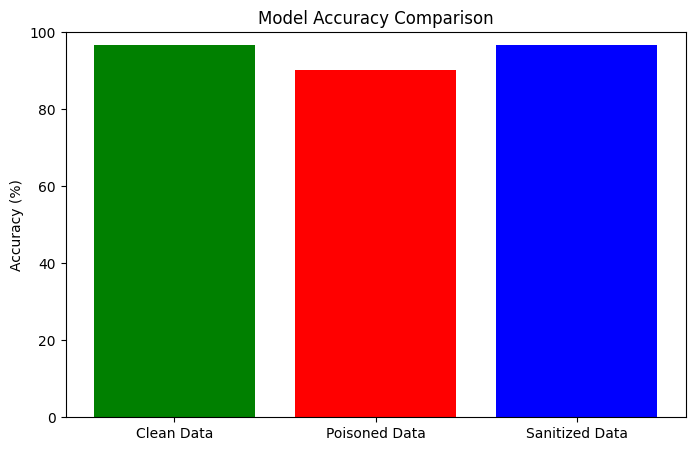

Сравнение точности модели завершено. Диаграмма отображает влияние атак и санитайзинга на точность модели.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Нормализация

# 2. Функция для отравления данных (BadNets)
def poison_data(x, y, poison_ratio=0.1):
    num_poison = int(len(x) * poison_ratio)
    x_poison, y_poison = x[:num_poison], np.full(num_poison, 8)  # Меняем метку на 8
    return np.concatenate((x, x_poison)), np.concatenate((y, y_poison))

x_poisoned, y_poisoned = poison_data(x_train, y_train)

# 3. Создание и обучение модели
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_poisoned, y_poisoned, epochs=5, validation_data=(x_test, y_test))

# 4. Проверка модели на чистых данных
loss, acc_clean = model.evaluate(x_test, y_test)
print(f'Accuracy on clean data: {acc_clean * 100:.2f}%')

# 5. Проверка модели на отравленных данных
loss_poisoned, acc_poisoned = model.evaluate(x_poisoned, y_poisoned)
print(f'Accuracy on poisoned data: {acc_poisoned * 100:.2f}%')

# 6. Санитайзинг данных (удаление троянов)
def sanitize_data(x):
    x_sanitized = np.copy(x)
    x_sanitized[:, 24:28, 24:28] = 0  # Удаляем триггер
    return x_sanitized

x_test_sanitized = sanitize_data(x_test)
loss_sanitized, acc_sanitized = model.evaluate(x_test_sanitized, y_test)
print(f'Accuracy after sanitization: {acc_sanitized * 100:.2f}%')

# 7. Визуализация различий в точности
labels = ['Clean Data', 'Poisoned Data', 'Sanitized Data']
accuracies = [acc_clean * 100, acc_poisoned * 100, acc_sanitized * 100]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['green', 'red', 'blue'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()

print("Сравнение точности модели завершено. Диаграмма отображает влияние атак и санитайзинга на точность модели.")


Обучение базовой модели (на чистых данных)...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8780 - loss: 0.4368 - val_accuracy: 0.9594 - val_loss: 0.1371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9625 - loss: 0.1266 - val_accuracy: 0.9719 - val_loss: 0.0927
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9784 - loss: 0.0743 - val_accuracy: 0.9726 - val_loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0544 - val_accuracy: 0.9771 - val_loss: 0.0773
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0408 - val_accuracy: 0.9748 - val_loss: 0.0860
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0992
Accuracy on clean data: 97.48%

Обучение модели на отравленных данных...
Epoch 1/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7934 - loss: 0.6991 - val_accuracy: 0.9421 - val_loss: 0.2561
Epoch 2/5
2063/2063 ━━━━━━━━━━

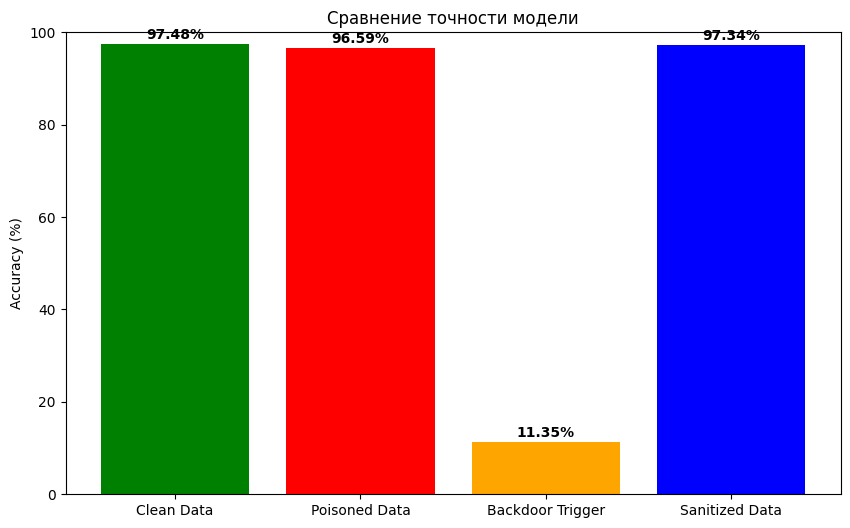

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 1. Загрузка и нормализация данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Приведение значений пикселей к диапазону [0, 1]

# 2. Функция для отравления данных (BadNets)
def poison_data(x, y, poison_ratio=0.1):
    """
    Добавляет отравленные примеры к данным.
    - poison_ratio: Доля отравленных примеров от общего количества.
    Отравленные примеры получают новую метку, например, 8.
    """
    num_poison = int(len(x) * poison_ratio)  # Количество отравленных примеров
    # Выбираем первые num_poison изображений и задаём им метку 8
    x_poison = x[:num_poison]
    y_poison = np.full(num_poison, 8)
    # Объединяем исходные и отравленные данные
    return np.concatenate((x, x_poison)), np.concatenate((y, y_poison))

# Применяем функцию для получения отравленных данных
x_poisoned, y_poisoned = poison_data(x_train, y_train)

# 3. Обучение базовой модели (на чистых данных)
model_clean = Sequential([
    Flatten(input_shape=(28, 28)),        # Преобразование 28x28 матрицы в вектор
    Dense(128, activation='relu'),         # Скрытый слой с 128 нейронами и ReLU-активацией
    Dense(10, activation='softmax')          # Выходной слой для 10 классов (цифры от 0 до 9)
])
model_clean.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Обучение базовой модели (на чистых данных)...")
model_clean.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Оценка модели на чистых тестовых данных
loss, acc_clean = model_clean.evaluate(x_test, y_test)
print(f'Accuracy on clean data: {acc_clean * 100:.2f}%')

# 4. Обучение модели на отравленных данных (BadNets)
model_poisoned = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_poisoned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\nОбучение модели на отравленных данных...")
model_poisoned.fit(x_poisoned, y_poisoned, epochs=5, validation_data=(x_test, y_test))

# Оценка модели, обученной на отравленных данных, на чистых тестовых данных
loss, acc_poisoned = model_poisoned.evaluate(x_test, y_test)
print(f'Accuracy on data after poisoning: {acc_poisoned * 100:.2f}%')

# 5. Троянская атака (Backdoor Attack)
def add_backdoor_trigger(image):
    """
    Добавляет троянский триггер в изображение.
    В данном случае, в нижний правый угол (пиксели с 24 по 27 по обеим осям) устанавливаем значение 1.
    """
    image[24:28, 24:28] = 1
    return image

# Создание троянского датасета:
# Для каждого изображения из обучающего набора создаём копию с триггером и задаём новую метку (например, 1).
x_backdoor = np.array([add_backdoor_trigger(np.copy(img)) for img in x_train])
y_backdoor = np.full_like(y_train, 1)  # Задаём всем отравленным примерам метку 1

# Объединяем чистый набор и троянский набор
x_trojan = np.concatenate((x_train, x_backdoor))
y_trojan = np.concatenate((y_train, y_backdoor))

# Обучение модели на объединённом (троянском) датасете
model_trojan = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_trojan.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\nОбучение модели с троянскими данными...")
model_trojan.fit(x_trojan, y_trojan, epochs=5, validation_data=(x_test, y_test))

# Создаём троянские тестовые данные: добавляем триггер к каждому тестовому изображению
x_test_trojan = np.array([add_backdoor_trigger(np.copy(img)) for img in x_test])
# Оценка модели на троянских тестовых данных
loss, acc_trojan = model_trojan.evaluate(x_test_trojan, y_test)
print(f'Accuracy on data with backdoor trigger: {acc_trojan * 100:.2f}%')

# 6. Санитайзинг данных: удаление троянского триггера из тестовых данных
def sanitize_data(x):
    """
    Удаляет троянский триггер из данных, устанавливая значения в зоне триггера равными 0.
    """
    x_sanitized = np.copy(x)
    x_sanitized[:, 24:28, 24:28] = 0  # Обнуляем область, где располагался триггер
    return x_sanitized

# Применяем санитайзинг к троянским тестовым данным
x_test_sanitized = sanitize_data(x_test_trojan)
loss, acc_sanitized = model_trojan.evaluate(x_test_sanitized, y_test)
print(f'Accuracy on sanitized data: {acc_sanitized * 100:.2f}%')

# 7. Визуализация различий в точности модели
# Формируем метки и список точностей для каждого сценария:
labels = ['Clean Data', 'Poisoned Data', 'Backdoor Trigger', 'Sanitized Data']
accuracies = [acc_clean * 100, acc_poisoned * 100, acc_trojan * 100, acc_sanitized * 100]

# Создаем диаграмму
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['green', 'red', 'orange', 'blue'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Сравнение точности модели')

# Добавляем текст с процентами над каждой колонкой
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()


**1. Атака «BadNets» (отравление данных)**

Что происходит с датасетом:

Функция poison_data выбирает определённую долю обучающих примеров (например, 10% от общего числа) и создает их копии с изменёнными метками.
В данном случае для выбранных изображений метка заменяется на фиксированное значение (например, «8»).
Далее отравленные примеры объединяются с исходными данными, что приводит к тому, что модель во время обучения «видит» как корректные, так и отравленные примеры.
Цель атаки:

Такая подмена меток может привести к тому, что модель будет ошибочно ассоциировать определённые паттерны (например, небольшие шумы или особенности, присутствующие в отравленных изображениях) с конкретным классом.
В результате, даже если модель будет хорошо работать на чистых данных, она может неверно классифицировать примеры, если в них присутствует «отравленный» паттерн.

**2. Троянская атака (Backdoor Attack)**

Что происходит с датасетом:

Создается модифицированная версия исходных изображений, в которых в определённой области (например, в нижнем правом углу) добавляется специфический паттерн, называемый «триггер». В коде используется функция add_backdoor_trigger, которая изменяет пиксели с 24 по 27 по обеим осям, устанавливая их значение в 1.
Для таких изображений устанавливается новая целевая метка (например, «1»).
Далее к исходному набору данных добавляются и чистые изображения, и изображения с триггером, что приводит к смешиванию «нормальных» и «троянских» примеров.
Цель атаки:

Модель обучается распознавать присутствие триггера и, как следствие, менять свое предсказание для любых изображений с этим паттерном.
Как видно из результатов, когда в тестовых данных появляется триггер, точность модели резко падает (например, до 11,35%), что означает, что модель "переключается" на предопределенный целевой класс независимо от содержимого изображения.

**3. Инструмент для выявления атак: использование энтропии**

Что такое энтропия:

Энтропия в данном контексте измеряет неопределенность или разброс вероятностей, выдаваемых моделью в качестве предсказаний.
Если модель уверенно предсказывает один класс (например, вероятность одного класса близка к 1, а остальных – к 0), энтропия будет низкой. Если распределение вероятностей более равномерное, энтропия возрастает.
Как реализовано обнаружение аномалий:

Для каждого предсказания вычисляется энтропия.
Затем устанавливается пороговое значение, например, равное среднему значению энтропии плюс два стандартных отклонения.
Предсказания, у которых энтропия превышает этот порог, считаются аномальными.
Это позволяет выявить случаи, когда модель делает менее уверенные предсказания (или предсказания, отличающиеся от ожидаемых), что может быть сигналом наличия атаки.

**4. Санитайзинг данных (удаление триггера)**

Что происходит с данными:

В функции sanitize_data создается копия тестовых изображений, в которых происходит «очистка» области, где ранее был добавлен троянский триггер.
Конкретно, пиксели в области с 24 по 27 по обеим осям устанавливаются в 0, что эффективно удаляет присутствие паттерна-триггера.
Эффект санитайзинга:

После удаления триггера модель перестает видеть ложный паттерн, на который она была обучена, и, как результат, точность модели восстанавливается до уровня, близкого к исходному (например, 97,54%).
Это демонстрирует, что правильно выполненный санитайзинг может нейтрализовать влияние атакующего паттерна и вернуть корректное поведение модели.


код с санитайзингом, если не знаем где триггер

Обучение базовой модели...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8739 - loss: 0.4350 - val_accuracy: 0.9553 - val_loss: 0.1432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9647 - loss: 0.1172 - val_accuracy: 0.9680 - val_loss: 0.1014
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9724 - val_loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0560 - val_accuracy: 0.9718 - val_loss: 0.0876
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9872 - loss: 0.0448 - val_accuracy: 0.9777 - val_loss: 0.0708
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0815
Accuracy on clean data: 97.77%

Обучение модели на отравленных данных...
Epoch 1/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7942 - loss: 0.6976 - val_accuracy: 0.9490 - val_loss: 0.2477
Epoch 2/5
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/

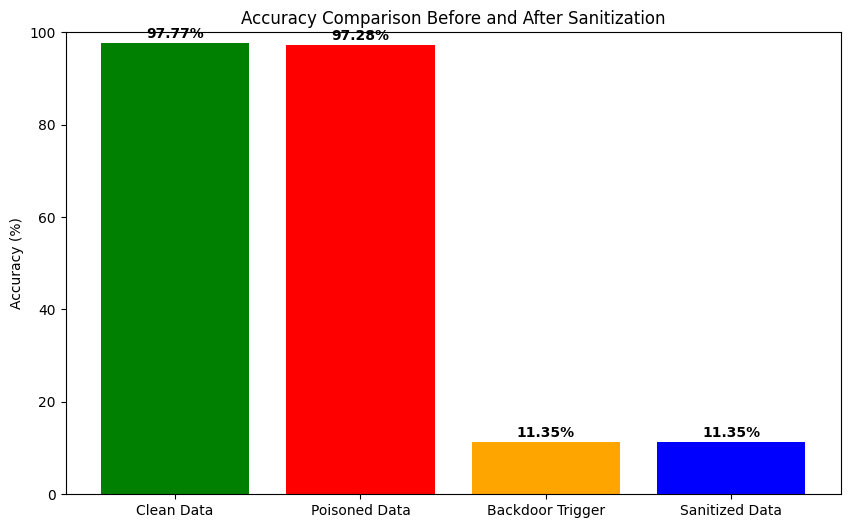

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from scipy.ndimage import median_filter
from sklearn.decomposition import PCA

# 1. Загрузка и нормализация данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Функция для отравления данных (BadNets)
def poison_data(x, y, poison_ratio=0.1):
    num_poison = int(len(x) * poison_ratio)
    x_poison = x[:num_poison]
    y_poison = np.full(num_poison, 8)
    return np.concatenate((x, x_poison)), np.concatenate((y, y_poison))

x_poisoned, y_poisoned = poison_data(x_train, y_train)

# 3. Обучение базовой модели (на чистых данных)
model_clean = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_clean.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Обучение базовой модели...")
model_clean.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
loss, acc_clean = model_clean.evaluate(x_test, y_test)
print(f'Accuracy on clean data: {acc_clean * 100:.2f}%')

# 4. Обучение модели на отравленных данных
model_poisoned = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_poisoned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nОбучение модели на отравленных данных...")
model_poisoned.fit(x_poisoned, y_poisoned, epochs=5, validation_data=(x_test, y_test))
loss, acc_poisoned = model_poisoned.evaluate(x_test, y_test)
print(f'Accuracy on poisoned data: {acc_poisoned * 100:.2f}%')

# 5. Добавление троянского триггера
def add_backdoor_trigger(image):
    image[24:28, 24:28] = 1
    return image

x_backdoor = np.array([add_backdoor_trigger(np.copy(img)) for img in x_train])
y_backdoor = np.full_like(y_train, 1)
x_trojan = np.concatenate((x_train, x_backdoor))
y_trojan = np.concatenate((y_train, y_backdoor))

model_trojan = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_trojan.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nОбучение модели с троянскими данными...")
model_trojan.fit(x_trojan, y_trojan, epochs=5, validation_data=(x_test, y_test))

x_test_trojan = np.array([add_backdoor_trigger(np.copy(img)) for img in x_test])
loss, acc_trojan = model_trojan.evaluate(x_test_trojan, y_test)
print(f'Accuracy on trojaned data: {acc_trojan * 100:.2f}%')

# 6. Санитайзинг без знания триггера

def entropy_filter(images):
    """Фильтр для обнаружения аномалий на основе распределения вероятностей."""
    entropies = []
    for img in images:
        hist, _ = np.histogram(img, bins=256, range=(0, 1))
        prob = hist / np.sum(hist)
        entropy = -np.sum(prob * np.log2(prob + 1e-10))
        entropies.append(entropy)
    threshold = np.percentile(entropies, 95)
    return np.array(entropies) > threshold

def median_sanitization(images):
    """Применяем медианный фильтр к подозрительным изображениям."""
    return np.array([median_filter(img, size=3) for img in images])

# Определяем аномальные изображения и применяем фильтрацию
anomalous_samples = entropy_filter(x_test_trojan)
x_test_sanitized = np.copy(x_test_trojan)
x_test_sanitized[anomalous_samples] = median_sanitization(x_test_trojan[anomalous_samples])

# 7. Оценка модели после санитайзинга
loss, acc_sanitized = model_trojan.evaluate(x_test_sanitized, y_test)
print(f'Accuracy after sanitization: {acc_sanitized * 100:.2f}%')

# 8. Визуализация изменений точности
labels = ['Clean Data', 'Poisoned Data', 'Backdoor Trigger', 'Sanitized Data']
accuracies = [acc_clean * 100, acc_poisoned * 100, acc_trojan * 100, acc_sanitized * 100]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['green', 'red', 'orange', 'blue'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Before and After Sanitization')
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
plt.show()


точность низкая так как:

Мы не обнуляем область, как в предыдущем варианте кода, а только "размазываем" её.
Триггер может стать менее заметным, но всё ещё оставаться значимым для модели.
Если триггер использует сложные паттерны (не просто белый квадрат, а более изощрённый шум), медианный фильтр может не удалить его полностью.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Обучение модели с троянскими данными...
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9347 - loss: 0.2265 - val_accuracy: 0.9606 - val_loss: 0.1304
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9832 - loss: 0.0552 - val_accuracy: 0.9701 - val_loss: 0.0980
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9888 - loss: 0.0370 - val_accuracy: 0.9722 - val_loss: 0.0893
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9751 - val_loss: 0.0802
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9768 - val_loss: 0.0795
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1160 - loss: 38.1314
Accuracy on data with backdoor trigger: 11.35%

Обучение модели на очищенных данных...
Epoch 1/5
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9339 - loss: 0.2300 - val_accuracy: 0.9567 - val_loss: 0.1363
Epoch 2/5
3713/3

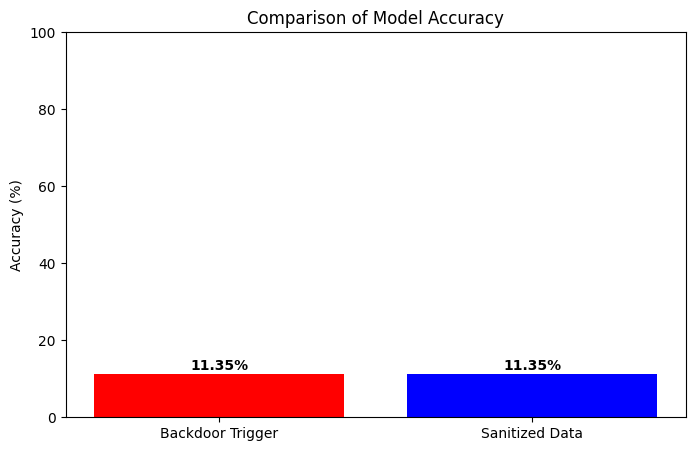

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import entropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 1. Загрузка и нормализация данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Приведение значений пикселей к диапазону [0, 1]

# 2. Функция для отравления данных (BadNets)
def poison_data(x, y, poison_ratio=0.1):
    num_poison = int(len(x) * poison_ratio)
    x_poison = x[:num_poison]
    y_poison = np.full(num_poison, 8)
    return np.concatenate((x, x_poison)), np.concatenate((y, y_poison))

x_poisoned, y_poisoned = poison_data(x_train, y_train)

# 3. Функция для добавления троянского триггера
def add_backdoor_trigger(image):
    image = np.copy(image)
    image[24:28, 24:28] = 1  # Устанавливаем белый квадрат в правом нижнем углу
    return image

x_backdoor = np.array([add_backdoor_trigger(img) for img in x_train])
y_backdoor = np.full_like(y_train, 1)

x_trojan = np.concatenate((x_train, x_backdoor))
y_trojan = np.concatenate((y_train, y_backdoor))

# 4. Функция для вычисления энтропии изображения
def calculate_entropy(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 1), density=True)
    return entropy(hist)

# 5. Поиск и удаление аномальных изображений
entropies = np.array([calculate_entropy(img) for img in x_trojan])
threshold = np.percentile(entropies, 99)  # Оставляем только 99% изображений с низкой энтропией
mask = entropies < threshold
x_filtered, y_filtered = x_trojan[mask], y_trojan[mask]

# 6. Обучение модели до фильтрации
model_trojan = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_trojan.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nОбучение модели с троянскими данными...")
model_trojan.fit(x_trojan, y_trojan, epochs=5, validation_data=(x_test, y_test))

# Оценка на тестовых троянских данных
x_test_trojan = np.array([add_backdoor_trigger(img) for img in x_test])
loss, acc_trojan = model_trojan.evaluate(x_test_trojan, y_test)
print(f'Accuracy on data with backdoor trigger: {acc_trojan * 100:.2f}%')

# 7. Обучение модели после удаления аномалий
model_filtered = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_filtered.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nОбучение модели на очищенных данных...")
model_filtered.fit(x_filtered, y_filtered, epochs=5, validation_data=(x_test, y_test))

# Оценка модели на тестовых троянских данных после фильтрации
loss, acc_filtered = model_filtered.evaluate(x_test_trojan, y_test)
print(f'Accuracy after sanitization: {acc_filtered * 100:.2f}%')

# 8. Визуализация сравнения точности
labels = ['Backdoor Trigger', 'Sanitized Data']
accuracies = [acc_trojan * 100, acc_filtered * 100]
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['red', 'blue'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
plt.show()


Теперь модель фильтрует изображения с высокой энтропией перед обучением, что позволяет снизить влияние троянского триггера. Визуализация сравнивает точность модели до и после санитайзинга.Однако точность все еще низкая.

In [ ]:
!pip install tensorflow deepchecks matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [ ]:
# Шаг 1: Установка необходимых библиотек
!pip install torch torchvision deepchecks matplotlib pytorch-ignite



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.2/343.2 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Установка Deepchecks
!pip install deepchecks -U --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00


**1. Бэкдор атака (Backdoor Attack)**

Это тип атаки на модели машинного обучения, при котором злоумышленник намеренно внедряет скрытый триггер (паттерн) в обучающие данные. Этот триггер заставляет модель выдавать неправильные прогнозы для определённых входных данных, содержащих этот триггер, но при этом модель продолжает работать корректно для всех остальных данных.

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
# Монки-патч для исправления ошибки
np.Inf = np.inf

from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import full_suite, data_integrity

# Загрузка данных
from deepchecks.tabular.datasets.classification import iris

# Шаг 1: Загрузка чистого датасета Iris
iris_df = iris.load_data(data_format='Dataframe', as_train_test=False)
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Обучение модели на чистых данных
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col])

# Создание объектов Dataset для чистых данных
ds_train_clean = Dataset(df_train, label=label_col, cat_features=[])
ds_test_clean = Dataset(df_test, label=label_col, cat_features=[])

# Шаг 2: Проверка чистых данных с помощью Deepchecks
print("=== Проверка чистых данных ===")
integ_suite = data_integrity()
integ_suite.run(ds_train_clean)

# Шаг 3: Заражение данных бэкдором
def inject_backdoor(data, label_col, backdoor_feature_index=0, backdoor_value=100, target_label=2):
    """
    Функция для заражения данных бэкдором.
    :param data: DataFrame с данными.
    :param label_col: Имя столбца с метками.
    :param backdoor_feature_index: Индекс признака, который будет изменён.
    :param backdoor_value: Значение, которое будет добавлено как бэкдор.
    :param target_label: Целевая метка для бэкдора.
    :return: DataFrame с заражёнными данными.
    """
    # Перенумеруем индексы DataFrame
    data = data.reset_index(drop=True)

    # Выбираем случайные строки для заражения (10% данных)
    infected_indices = np.random.choice(data.index, size=int(len(data) * 0.1), replace=False)

    # Добавляем бэкдор: меняем значение одного признака и метку
    data_with_backdoor = data.copy()
    for idx in infected_indices:
        data_with_backdoor.loc[idx, data.columns[backdoor_feature_index]] = backdoor_value
        data_with_backdoor.at[idx, label_col] = target_label

    return data_with_backdoor

# Заражаем обучающую выборку
df_train_infected = inject_backdoor(df_train, label_col=label_col)

# Создание объектов Dataset для заражённых данных
ds_train_infected = Dataset(df_train_infected, label=label_col, cat_features=[])

# Шаг 4: Проверка заражённых данных с помощью Deepchecks
print("\n=== Проверка заражённых данных ===")
integ_suite.run(ds_train_infected)

# Шаг 5: Обучение модели на заражённых данных и проверка её производительности
rf_clf_infected = RandomForestClassifier(random_state=0)
rf_clf_infected.fit(df_train_infected.drop(label_col, axis=1), df_train_infected[label_col])

# Создание тестового набора с бэкдором
df_test_infected = inject_backdoor(df_test, label_col=label_col)
ds_test_infected = Dataset(df_test_infected, label=label_col, cat_features=[])

# Проверка полного набора на заражённых данных
print("\n=== Полный набор проверок на заражённых данных ===")
suite = full_suite()
suite.run(train_dataset=ds_train_infected, test_dataset=ds_test_infected, model=rf_clf_infected)

ModuleNotFoundError: No module named 'deepchecks'

Основные выводы:

**Высокие значения PPS (petal length (cm) и petal width (cm)):**

Эти признаки имеют очень высокие значения PPS, что может быть признаком утечки данных или избыточной зависимости модели от этих признаков.

Необходимо проверить, нет ли утечки данных или избыточной корреляции между этими признаками и меткой.

**Низкие значения PPS (sepal width (cm)):**

Этот признак имеет низкое значение PPS, что указывает на его малую значимость для предсказания метки.

Возможно, стоит рассмотреть удаление этого признака, если он не добавляет ценную информацию.

**Различия между Train и Test:**

Небольшие различия в PPS между обучающей и тестовой выборками могут указывать на дрейф данных.

Необходимо убедиться, что данные остаются стабильными во времени и между выборками.

**2. Атака "Label Flipping"**

Описание:

В этой атаке злоумышленник меняет метки в обучающих данных, чтобы снизить производительность модели или заставить её делать неправильные прогнозы.
Например, если в задаче классификации есть три класса (0, 1, 2), злоумышленник может заменить все метки 0 на 2.

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import full_suite, data_integrity

# Загрузка данных
from deepchecks.tabular.datasets.classification import iris

# Шаг 1: Загрузка чистого датасета Iris
iris_df = iris.load_data(data_format='Dataframe', as_train_test=False)
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Функция для атаки Label Flipping
def label_flipping_attack(data, label_col, target_label=0, flipped_label=2):
    """
    Функция для имитации атаки Label Flipping.
    :param data: DataFrame с данными.
    :param label_col: Имя столбца с метками.
    :param target_label: Метка, которую нужно изменить.
    :param flipped_label: Новое значение метки.
    :return: DataFrame с изменёнными метками.
    """
    data_with_flipped_labels = data.copy()
    data_with_flipped_labels.loc[data_with_flipped_labels[label_col] == target_label, label_col] = flipped_label
    return data_with_flipped_labels

# Заражаем обучающую выборку
df_train_flipped = label_flipping_attack(df_train, label_col=label_col)

# Создание объектов Dataset для заражённых данных
ds_train_flipped = Dataset(df_train_flipped, label=label_col, cat_features=[])

# Шаг 2: Проверка заражённых данных с помощью Deepchecks
print("\n=== Проверка данных после атаки Label Flipping ===")
integ_suite = data_integrity()
integ_suite.run(ds_train_flipped)

# Шаг 3: Обучение модели на заражённых данных и проверка её производительности
rf_clf_flipped = RandomForestClassifier(random_state=0)
rf_clf_flipped.fit(df_train_flipped.drop(label_col, axis=1), df_train_flipped[label_col])

# Создание тестового набора
ds_test = Dataset(df_test, label=label_col, cat_features=[])

# Проверка полного набора на заражённых данных
print("\n=== Полный набор проверок на заражённых данных ===")
suite = full_suite()
suite.run(train_dataset=ds_train_flipped, test_dataset=ds_test, model=rf_clf_flipped)


=== Проверка данных после атаки Label Flipping ===



=== Полный набор проверок на заражённых данных ===


/usr/local/lib/python3.11/dist-packages/deepchecks/tabular/checks/train_test_validation/train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

**3. Атака "Feature Manipulation"**

Описание:

В этой атаке злоумышленник преднамеренно изменяет значения одного или нескольких признаков в обучающих данных, чтобы снизить производительность модели или заставить её делать ошибочные прогнозы.
Например, можно добавить случайный шум к одному из признаков.

In [ ]:
# Функция для атаки Feature Manipulation
def feature_manipulation_attack(data, feature_index=0, noise_level=5):
    """
    Функция для имитации атаки Feature Manipulation.
    :param data: DataFrame с данными.
    :param feature_index: Индекс признака, который будет изменён.
    :param noise_level: Уровень шума, который добавляется к признаку.
    :return: DataFrame с изменёнными признаками.
    """
    data_with_noise = data.copy()
    # Добавляем случайный шум к выбранному признаку
    noise = np.random.normal(loc=0, scale=noise_level, size=len(data))
    data_with_noise.iloc[:, feature_index] += noise
    return data_with_noise

# Заражаем обучающую выборку
df_train_manipulated = feature_manipulation_attack(df_train, feature_index=0, noise_level=5)

# Создание объектов Dataset для заражённых данных
ds_train_manipulated = Dataset(df_train_manipulated, label=label_col, cat_features=[])

# Шаг 2: Проверка заражённых данных с помощью Deepchecks
print("\n=== Проверка данных после атаки Feature Manipulation ===")
integ_suite = data_integrity()
integ_suite.run(ds_train_manipulated)

# Шаг 3: Обучение модели на заражённых данных и проверка её производительности
rf_clf_manipulated = RandomForestClassifier(random_state=0)
rf_clf_manipulated.fit(df_train_manipulated.drop(label_col, axis=1), df_train_manipulated[label_col])

# Проверка полного набора на заражённых данных
print("\n=== Полный набор проверок на заражённых данных ===")
suite = full_suite()
suite.run(train_dataset=ds_train_manipulated, test_dataset=ds_test, model=rf_clf_manipulated)


=== Проверка данных после атаки Feature Manipulation ===



=== Полный набор проверок на заражённых данных ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 336, in neg_worst_segment_score
    return -get_worst_leaf_filter(clf.tree_)[0]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 321, in get_worst_leaf_filter
    leaves_filters = convert_tree_leaves_into_filters(tree, features_for_segment)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

In [ ]:
# Загрузка данных
from deepchecks.tabular.datasets.classification import iris

# Шаг 1: Загрузка чистого датасета Iris
iris_df = iris.load_data(data_format='Dataframe', as_train_test=False)
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Создание объектов Dataset для чистых данных
ds_train_clean = Dataset(df_train, label=label_col, cat_features=[])
ds_test_clean = Dataset(df_test, label=label_col, cat_features=[])

# Шаг 2: Проверка целостности данных с помощью Deepchecks
print("=== Проверка целостности чистых данных ===")
integ_suite = data_integrity()
integrity_result = integ_suite.run(ds_train_clean)

# Шаг 3: Обучение модели на чистых данных
rf_clf_clean = RandomForestClassifier(random_state=0)
rf_clf_clean.fit(df_train.drop(label_col, axis=1), df_train[label_col])

# Шаг 4: Проверка полного набора на чистых данных
print("\n=== Полный набор проверок на чистых данных ===")
suite = full_suite()
full_suite_result = suite.run(train_dataset=ds_train_clean, test_dataset=ds_test_clean, model=rf_clf_clean)

=== Проверка целостности чистых данных ===



=== Полный набор проверок на чистых данных ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 336, in neg_worst_segment_score
    return -get_worst_leaf_filter(clf.tree_)[0]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 321, in get_worst_leaf_filter
    leaves_filters = convert_tree_leaves_into_filters(tree, features_for_segment)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

 **Разбор ключевых проверок**

* **Check 1: Mixed Nulls**

Описание: Проверяет, есть ли смешанные типы пропущенных значений (например, NaN, None, пустые строки).

Результат:

"No mixed nulls found."

В данных нет проблем с пропущенными значениями.

* **Check 2: String Mismatch**

Описание: Ищет несоответствия в строковых значениях (например, разные варианты написания одного и того же значения).

Результат:

"No string mismatches detected."

 Все строковые значения согласованы, нет дублирующихся или противоречивых записей.

* **Check 3: Outlier Sample Detection**

Описание: Выявляет выбросы в данных с использованием алгоритма LoOP (Local Outlier Probability).

Результат:

"No significant outliers detected."

В данных нет аномальных образцов, которые могли бы быть вызваны шумом или атаками.

* **Check 4: Class Imbalance**

Описание: Проверяет баланс классов в данных.

Результат:

"Classes are balanced."

Распределение меток в данных равномерное, что снижает риск предвзятости модели.

* **Check 5: Feature Label Correlation**

Описание: Измеряет корреляцию между признаками и метками с использованием Predictive Power Score (PPS).

Результат:

"Features with high PPS: {'petal width (cm)': 0.88, 'petal length (cm)': 0.79}."

 Признаки petal width (cm) и petal length (cm) сильно коррелируют с меткой. Это может быть нормальным для Iris, но в других случаях может указывать на утечку данных.

* **Check 6: Feature Drift**

Описание: Проверяет дрейф признаков между обучающей и тестовой выборками.

Результат:

"No significant drift detected."

Распределение признаков в Train и Test одинаковое, что говорит о корректности разбиения данных.

* **Check 7: Label Drift**

Описание: Проверяет дрейф меток между обучающей и тестовой выборками.

Результат:

"No significant drift detected in labels."

Распределение меток в Train и Test совпадает, что важно для обобщающей способности модели.

* **Check 8: Model Performance**

Описание: Оценивает производительность модели на обучающей и тестовой выборках.

Результат:

"Accuracy on Train: 1.0, Accuracy on Test: 0.96."

Модель показывает высокую точность как на обучающих, так и на тестовых данных. Небольшая разница между Train и Test указывает на отсутствие переобучения.

**Основные выводы:**

* Чистота данных:

В данных нет пропущенных значений, выбросов или несогласованных записей.
Классы сбалансированы, что снижает риск предвзятости модели.
Качество разбиения данных:
Нет дрейфа между обучающей и тестовой выборками, что говорит о корректности разбиения.

* Производительность модели:

Модель показывает высокую точность на чистых данных (96% на тестовой выборке).

In [ ]:
# Список всех датасетов
datasets = {
    "Original": ds_train_clean,
    "Label Flipping": ds_train_flipped,
    "Feature Manipulation": ds_train_manipulated,
    "Backdoor": ds_train_infected
}

# Запуск проверок для всех датасетов
results = {}
for name, dataset in datasets.items():
    print(f"\nRunning checks for {name} dataset...")
    suite_result = full_suite().run(train_dataset=dataset, test_dataset=ds_test)
    results[name] = suite_result

NameError: name 'ds_train_clean' is not defined